In [24]:
import pandas as pd
import time
import dask
import os

need to set up a local spark environment to run this aggregation. do set-up your own method.

In [25]:
import findspark
findspark.find()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import *

def set_spark_session():
    spark = SparkSession.builder.\
    appName("SomeAppName").\
    getOrCreate()
    return spark

spark = set_spark_session()

In [36]:
mach = pd.read_csv("logs/cluster_id_monitor",sep=":",dtype=str)
mach.columns = ['LOG','USER','STAGE','Clustered precinct ID','DATA','TIMEIT']
mach[(mach['STAGE']=='PARSING_OK') & (mach['DATA']=='vps_stats')]['Clustered precinct ID'].drop_duplicates().shape

(3214,)

## Aggregate ERs for President Cummulative Votes

Can be replicated for VP, Senators and Partylist cummulative votes

In [27]:
presidents = spark.read.csv("data/presidents_votes_*",header=True)

In [28]:
presidents.select("Candidate").distinct().show()

22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39030742
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020090
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39030899
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39030910
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39020712
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39060959
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39081284
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39101361
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39061077
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39111322
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39121714
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39111304
22/05/11 06:19:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39111558
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39121732
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39061038
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010026
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010083
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010171
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010227
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010271
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010165
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020042
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010358
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020015
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020235
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020206
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020265
22/05/11 06:19:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020466
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020368
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020405
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030237
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030139
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020603
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030222
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030192
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030270
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040059
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030369
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030427
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040367
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040299
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040332
22/05/11 06:19:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050112
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040480
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050162
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76060040
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050297
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070008
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070169
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070340
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070116
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070555
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070471
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070514
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070617
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070550
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070586
22/05/11 06:19:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Stat
 Schema: Candidate
Expected: Candidate but found: Stat
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automa

+--------------------+
|           Candidate|
+--------------------+
|         Valid votes|
|DOMAGOSO, ISKO MO...|
|  LACSON, PING (PDR)|
|MARCOS, BONGBONG ...|
| ROBREDO, LENI (IND)|
|         Under-votes|
|GONZALES, NORBERT...|
|MONTEMAYOR, JOSE ...|
|MANGONDATO, FAISA...|
|DE GUZMAN, LEODY ...|
| ABELLA, ERNIE (IND)|
|Votes obtained by...|
|PACQUIAO, MANNY P...|
+--------------------+



In [29]:
presidents_pdf = presidents.toPandas()

22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39030742
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39060947
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39030899
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39081285
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39111316
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39061038
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39121756
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_39121736
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010010
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010206
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010236
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76010298
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020025
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020151
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020006
22/05/11 06:19:22 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020316
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020420
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020285
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020503
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020479
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76020378
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030159
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030306
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030160
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030364
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030400
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76030431
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040146
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040355
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76040185
22/05/11 06:19:23 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050077
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050046
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050162
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070004
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070070
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76050419
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070190
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070339
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070281
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070541
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070488
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Automated_Election_Resuls_Parser/data/presidents_votes_stats_76070439
22/05/11 06:19:24 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 4, schema size: 5
CSV file: file:/mnt/nfs_export/2022Elex/PH_Au

In [30]:
presidents_pdf['Percentage'] = presidents_pdf['Percentage'].apply(lambda x: float(x.split("%")[0].strip(" ")))

In [31]:
cols = ['Valid votes','Votes obtained by all candidates','Under-votes','Votes obtained by all candidates']
presidents_pdf[presidents_pdf['Candidate'].isin(cols)==False].to_csv("./processed/ERS_TRANSMITTED_PRESIDENT.csv",sep="|", index=False)

make zip file. on linux this can be done.

In [32]:
!zip ./processed/ERS_TRANSMITTED_PRESIDENT.csv.zip ./processed/ERS_TRANSMITTED_PRESIDENT.csv

updating: processed/ERS_TRANSMITTED_PRESIDENT.csv (deflated 89%)


## Do quick histogram

In [33]:
pd.unique(presidents_pdf['Candidate'])

array(['ABELLA, ERNIE (IND)', 'DE GUZMAN, LEODY (PLM)',
       'DOMAGOSO, ISKO MORENO (AKSYON)', 'GONZALES, NORBERTO (PDSP)',
       'LACSON, PING (PDR)', 'MANGONDATO, FAISAL (KTPNAN)',
       'MARCOS, BONGBONG (PFP)', 'MONTEMAYOR, JOSE JR. (DPP)',
       'PACQUIAO, MANNY PACMAN(PROMDI)', 'ROBREDO, LENI (IND)',
       'Under-votes', 'Valid votes', 'Votes obtained by all candidates'],
      dtype=object)

<AxesSubplot:>

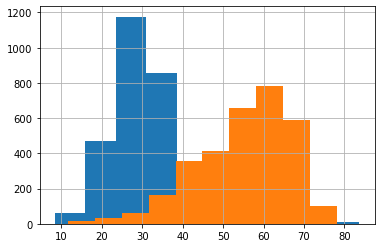

In [34]:
presidents_pdf[presidents_pdf['Candidate']=='ROBREDO, LENI (IND)']['Percentage'].hist()
presidents_pdf[presidents_pdf['Candidate']=='MARCOS, BONGBONG (PFP)']['Percentage'].hist()